In [5]:
#Notebook used to plot measurements from the HACC-Y1 mocks vs theory predictions
%pylab inline
import pylab as plt
import numpy as np
import treecorr
#import matplotlib as plt
path_treecorr='treecorr_output/'
path_CCL='./'

from astropy.io import fits
from scipy.interpolate import interp1d

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/common/miniconda/dp-v0.0.42-d/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Working on bins 1 1


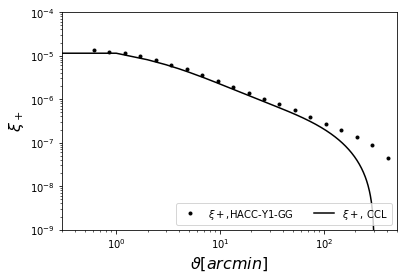

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


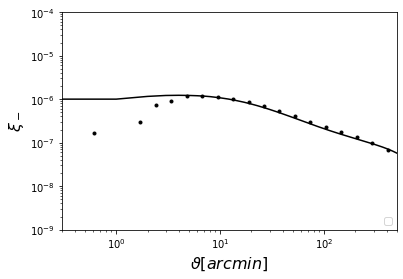

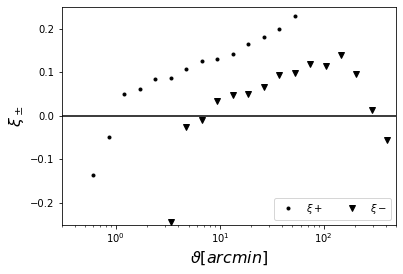

Working on bins 1 2


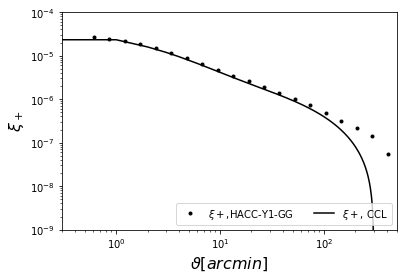

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


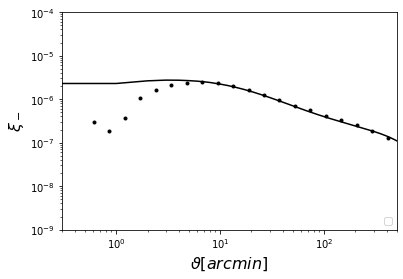

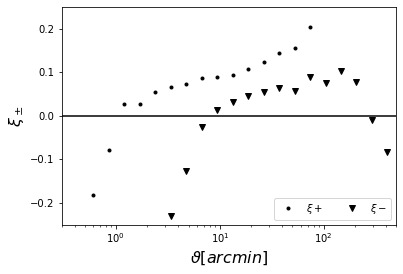

Working on bins 1 3


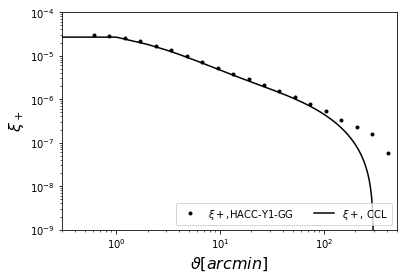

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


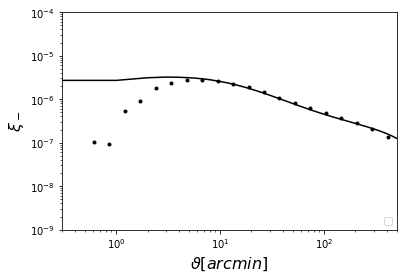

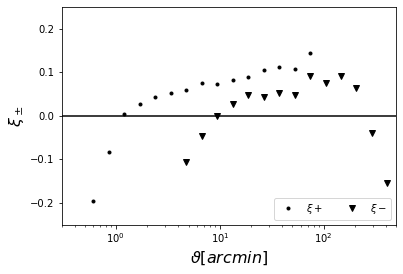

Working on bins 1 4


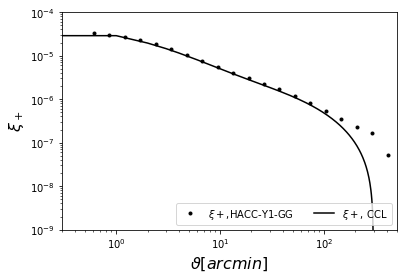

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


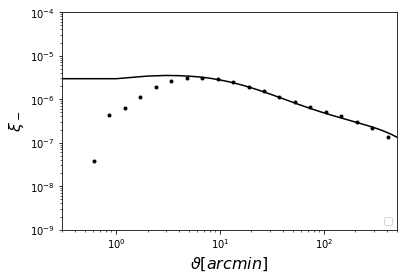

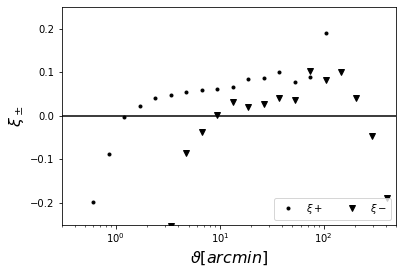

Working on bins 1 5


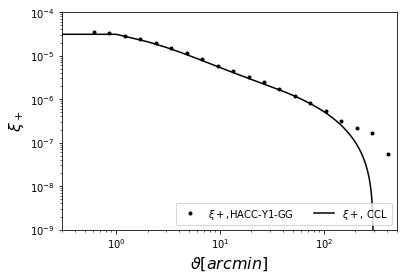

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


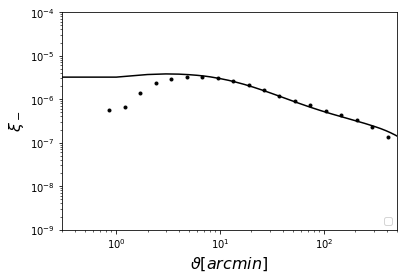

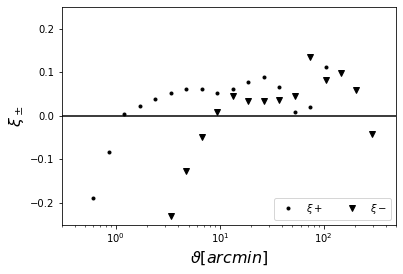

Working on bins 2 2


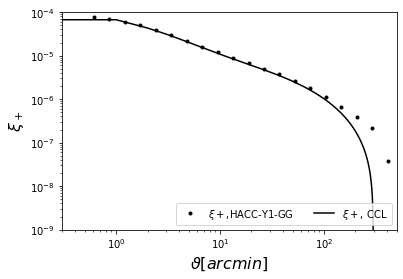

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


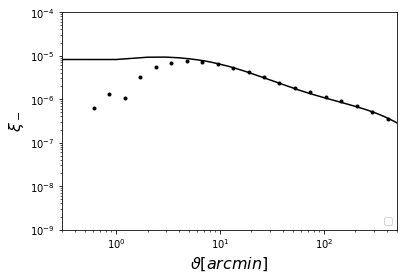

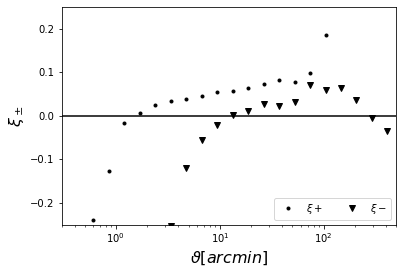

Working on bins 2 3


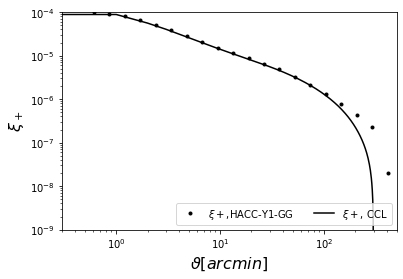

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


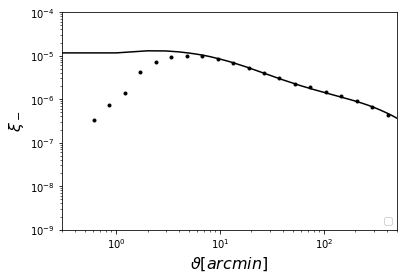

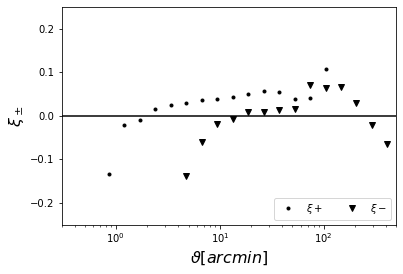

Working on bins 2 4


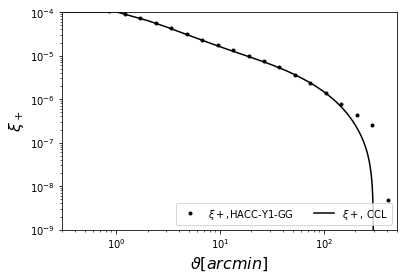

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


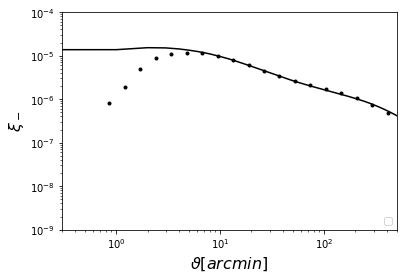

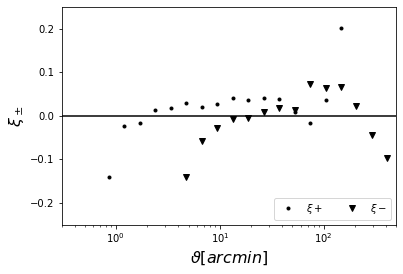

Working on bins 2 5


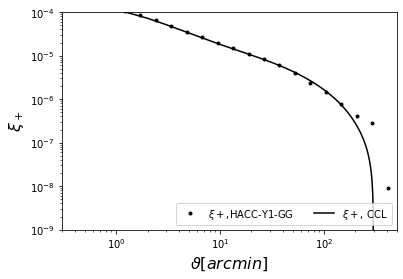

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


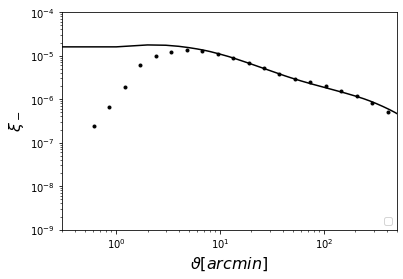

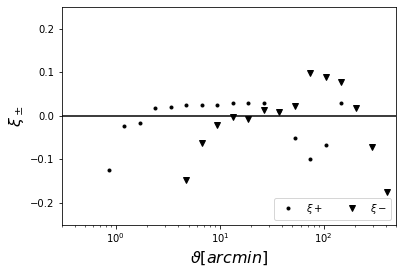

Working on bins 3 3


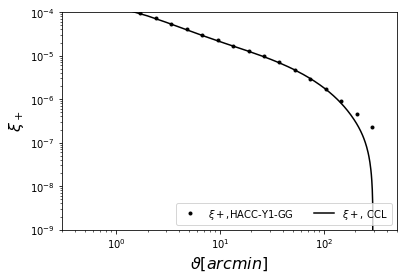

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


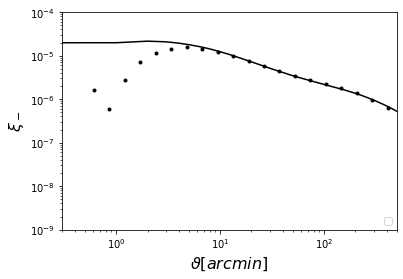

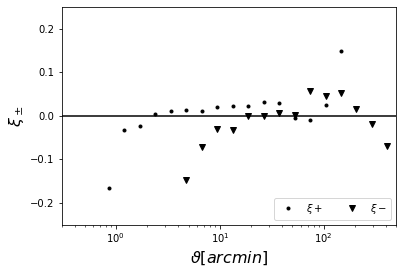

Working on bins 3 4


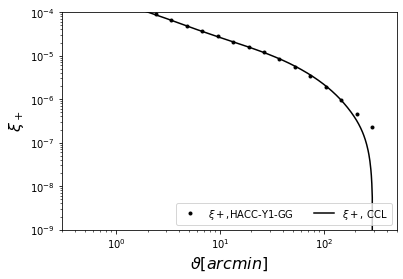

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


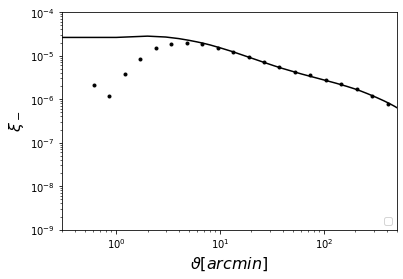

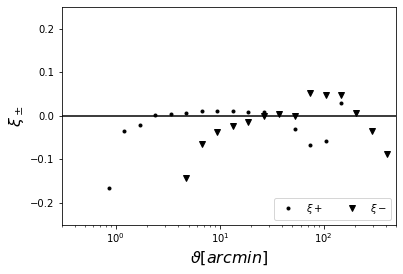

Working on bins 3 5


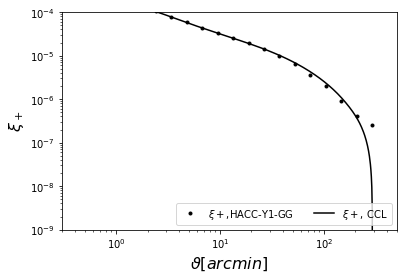

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


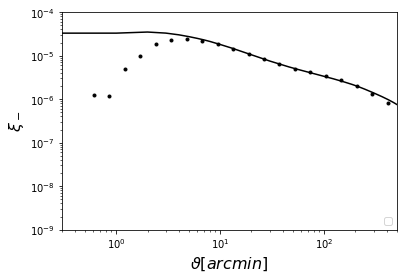

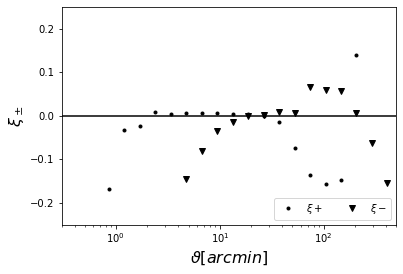

Working on bins 4 4


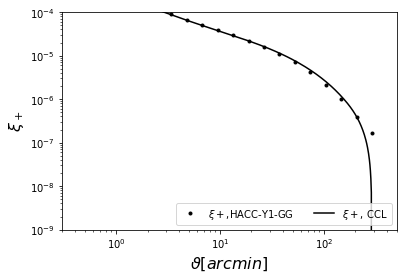

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


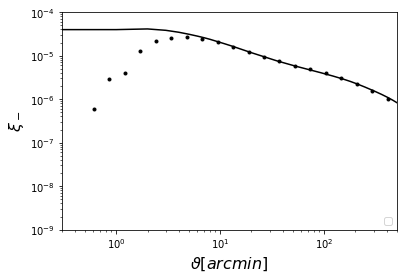

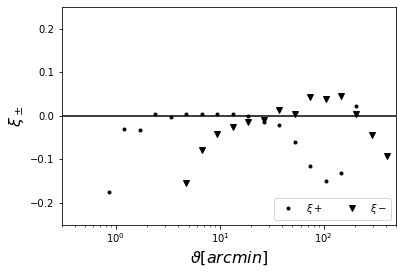

Working on bins 4 5


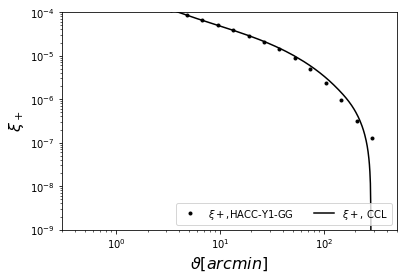

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


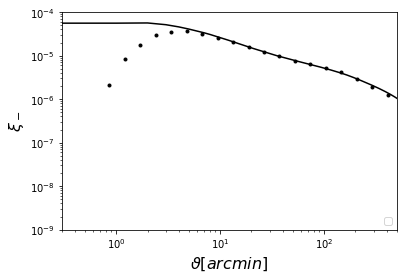

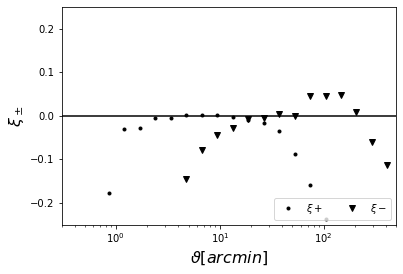

Working on bins 5 5


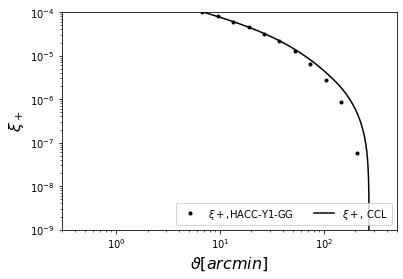

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


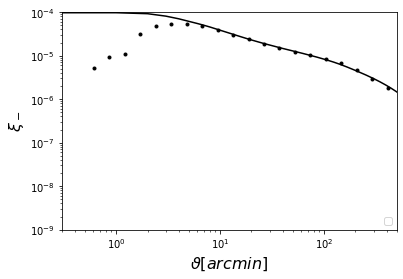

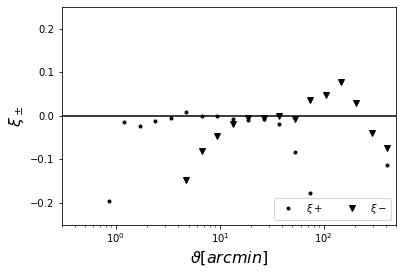

In [24]:
# Load the CCL predictions:
hdul = fits.open(path_CCL+'theo_prediction_1.0_0.0_0.0.fits')
        
data=hdul[1].data
NO_IA_plus_CCL=data['NO IA+'] # Xi + (no ia)
NO_IA_minus_CCL=data['NO IA-'] # Xi - (no ia)
GI_plus_CCL=data['GI+']        #GI + (TATT) 
GI_minus_CCL=data['GI-']       #GI - (TATT)
GI_NLA_plus_CCL=data['GI_NLA+']  #GI + (NLA),
GI_NLA_minus_CCL=data['GI_NLA-']  #GI - (NLA)
II_plus_CCL=data['II+']           #II + (TATT) 
II_minus_CCL=data['II-']         #II -   (TATT)
II_NLA_plus_CCL=data['II_NLA+']  #II +   (NLA)
II_NLA_minus_CCL=data['II_NLA-']     #II -  (NLA)
theta_CCL=data['theta']            # Angular separation(s) in arcmin
z_combination=data['bin_comb']  #redshift bin combination 

# Initialize:

Nbins=int(20)
Ntomo=int(5)
Ntomocomb = int(Ntomo*(Ntomo+1)/2);
counter=0
xip=np.empty([Nbins,Ntomocomb])
xim=np.empty([Nbins,Ntomocomb])
xip_IA=np.empty([Nbins,Ntomocomb])
xim_IA=np.empty([Nbins,Ntomocomb])
xip_pureIA=np.empty([Nbins,Ntomocomb])
xim_pureIA=np.empty([Nbins,Ntomocomb])
xip_GI=np.empty([Nbins,Ntomocomb])
xim_GI=np.empty([Nbins,Ntomocomb])

#Define the correlator, for plotting:
gg = treecorr.GGCorrelation(nbins = Nbins, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)

# test:
#for bin1 in range(1,2):
#    for bin2 in range (bin1,bin1+1):

# autobins only:
#for bin1 in range(1,6):
#    for bin2 in range (bin1,bin1+1):

# all:
for bin1 in np.arange(Ntomo)+1:
    for bin2 in range (bin1,Ntomo+1):

        
        print('Working on bins', bin1, bin2)
 
        # Get Treecorr measurements
        # pure cosmic shear:
        filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)
        gg.read(filename)
        xip[:,counter]=gg.xip
        xim[:,counter]=gg.xim       
        theta=gg.meanr     
        
        
        #Get theory (CCL)
        # Find the right column:
        for tomo in range(0,15):
            if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                #print(z_combination[tomo][0], z_combination[tomo][1])
                #print("Will use column",tomo)
                break
                
        theta_CCL=data['theta']
        theta_CCL=theta_CCL[0,:]
        xip_CCL=NO_IA_plus_CCL[tomo,:]
        xim_CCL=NO_IA_minus_CCL[tomo,:]

        #---------
        #plot xi+:
        
        # Sims:
        plt.plot(theta, xip[:,counter], 'k.', label='$\\xi+$,HACC-Y1-GG')
        #CCL:
        plt.plot(theta_CCL, xip_CCL, 'k-', label='$\\xi+$, CCL')
        
        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_+$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.ylim([1e-9, 1e-4])
        plt.show()


        #---------
        #plot xi-: 
        #Sims:
        plt.plot(theta, xim[:,counter], 'k.')#, label='$\\xi-$,SkySim-GG')
        #CCL
        plt.plot(theta_CCL, xim_CCL, 'k-')#, label='$\\xi-$, CCL')

        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_-$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.ylim([1e-9, 1e-4])

        plt.show() 
        

        # Show residuals:
        xip_interp = interp1d(theta_CCL, xip_CCL, kind='linear',bounds_error=False, fill_value=0.0)
        xim_interp = interp1d(theta_CCL, xim_CCL, kind='linear',bounds_error=False, fill_value=0.0)
        xip_ratio = xip[:,counter]/xip_interp(theta)
        xim_ratio = xim[:,counter]/xim_interp(theta)
        
        plt.plot(theta, xip_ratio-1, 'k.', label='$\\xi+$')
        plt.plot(theta, xim_ratio-1, 'kv', label='$\\xi-$')
        plt.plot(theta_CCL, theta_CCL-theta_CCL, 'k-')

        plt.semilogx()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_\pm$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.ylim([-0.25, 0.25])
        plt.show()

        counter +=1

        

In [20]:
xim[:,14]/xim_interp(theta)-1

array([-9.19488653e-01, -8.91428089e-01, -8.83602246e-01, -6.65577255e-01,
       -4.51951136e-01, -2.88582115e-01, -1.46962879e-01, -7.99688291e-02,
       -4.55847026e-02, -1.94575090e-02, -4.52452792e-03, -4.28307296e-03,
       -3.37063268e-04, -6.15952408e-03,  3.66106965e-02,  4.72267712e-02,
        7.78673618e-02,  3.07472401e-02, -3.99418894e-02, -7.29765575e-02])

In [15]:
xip

array([[ 1.3409e-05,  2.6703e-05,  3.0372e-05,  3.2786e-05,  3.5862e-05,
         7.6089e-05,  9.9894e-05,  1.1662e-04,  1.2838e-04,  1.5034e-04,
         1.8783e-04,  2.2604e-04,  2.5611e-04,  3.3493e-04,  5.1570e-04],
       [ 1.2250e-05,  2.4567e-05,  2.8197e-05,  3.0332e-05,  3.2777e-05,
         6.8922e-05,  9.1441e-05,  1.0474e-04,  1.2166e-04,  1.3489e-04,
         1.6989e-04,  2.0529e-04,  2.3245e-04,  3.0644e-04,  4.6682e-04],
       [ 1.1208e-05,  2.2248e-05,  2.4996e-05,  2.6785e-05,  2.8978e-05,
         6.0942e-05,  8.0021e-05,  9.1704e-05,  1.0396e-04,  1.1830e-04,
         1.4639e-04,  1.7643e-04,  1.9955e-04,  2.5933e-04,  3.9732e-04],
       [ 9.5996e-06,  1.8552e-05,  2.1254e-05,  2.2787e-05,  2.4455e-05,
         5.0572e-05,  6.5094e-05,  7.4143e-05,  8.3811e-05,  9.4997e-05,
         1.1744e-04,  1.4049e-04,  1.5646e-04,  2.0378e-04,  3.0821e-04],
       [ 7.9321e-06,  1.5093e-05,  1.7032e-05,  1.8259e-05,  1.9489e-05,
         3.9473e-05,  5.0646e-05,  5.7736e-05, 